In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Start opening data files and inspecting them

In [2]:
items = pd.read_csv("data/items.csv")
items_categories = pd.read_csv("data/item_categories.csv")
sales_train = pd.read_csv("data/sales_train.csv")
shops = pd.read_csv("data/shops.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

In [3]:
print(len(items))
items.head()

22170


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
print(len(items_categories))
items_categories.head()

84


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
print(len(sales_train))
sales_train.head()

2935849


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
print(len(shops))
shops.head()

60


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


## Item and categories

In [8]:
items_with_categories = pd.merge(items, items_categories, on="item_category_id", how="inner")
items_with_categories.head() 

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


In [9]:
items_with_categories["item_category_id"].value_counts()

40    5035
55    2365
37    1780
31    1125
58     790
      ... 
50       2
1        2
51       1
10       1
79       1
Name: item_category_id, Length: 84, dtype: int64

### Most popular item categories

Text(0, 0.5, 'Items of category')

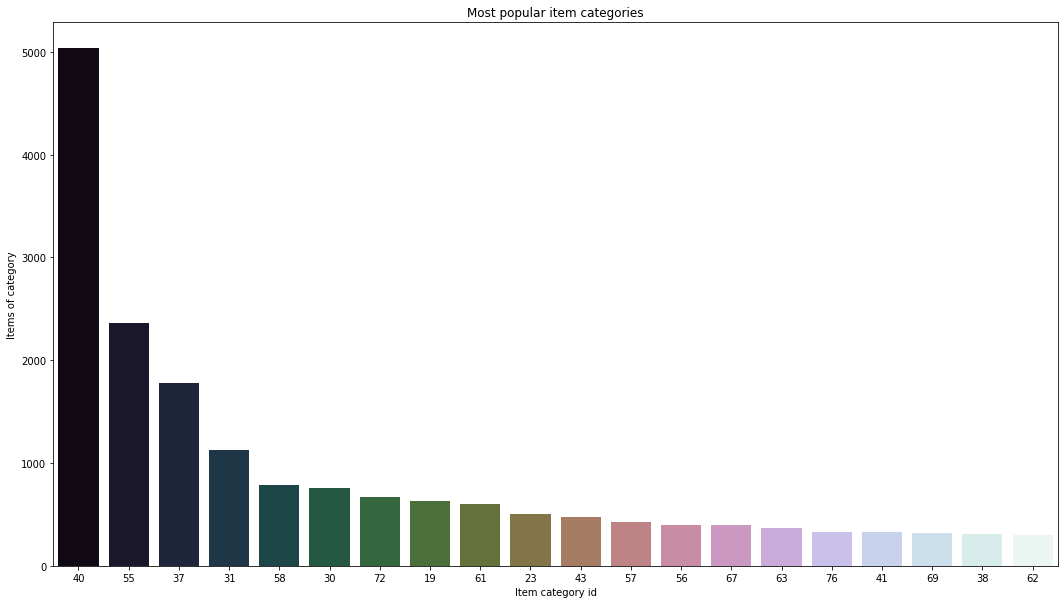

In [10]:
plt.figure(figsize=(18, 10))
g = sns.countplot(x="item_category_id", data=items_with_categories, order=items_with_categories["item_category_id"].value_counts().index[:20], palette="cubehelix")
g.set_title("Most popular item categories")
g.set_xlabel("Item category id")
g.set_ylabel("Items of category")

In [11]:
sales_items = pd.merge(items_with_categories, sales_train, on="item_id", how="inner")
sales_items.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


In [12]:
sales_by_month_by_categories = sales_items.groupby(["date_block_num", "item_category_id"]).agg({'item_cnt_day':'sum'}).reset_index()
sales_by_month_by_categories.head()

,date_block_num,item_category_id,item_cnt_day
0,0,0,1.0
1,0,1,1.0
2,0,2,1390.0
3,0,3,440.0
4,0,4,251.0


In [13]:
ten_most_popular_categories = pd.Series(items_with_categories["item_category_id"].value_counts().index[:10])
ten_most_popular_categories

0    40
1    55
2    37
3    31
4    58
5    30
6    72
7    19
8    61
9    23
dtype: int64

In [14]:
sales_by_month_popular_categories = pd.merge(sales_by_month_by_categories, pd.DataFrame(ten_most_popular_categories, columns=["item_category_id"]), on="item_category_id", how="inner")
sales_by_month_popular_categories.head(20)

,date_block_num,item_category_id,item_cnt_day
0,0,19,8983.0
1,1,19,10095.0
2,2,19,12327.0
3,3,19,7656.0
4,4,19,7280.0
5,5,19,12206.0
6,6,19,7497.0
7,7,19,10488.0
8,8,19,18932.0
9,9,19,14113.0


### Most popular item categories sales evolution

Text(0, 0.5, 'Sales for popular category')

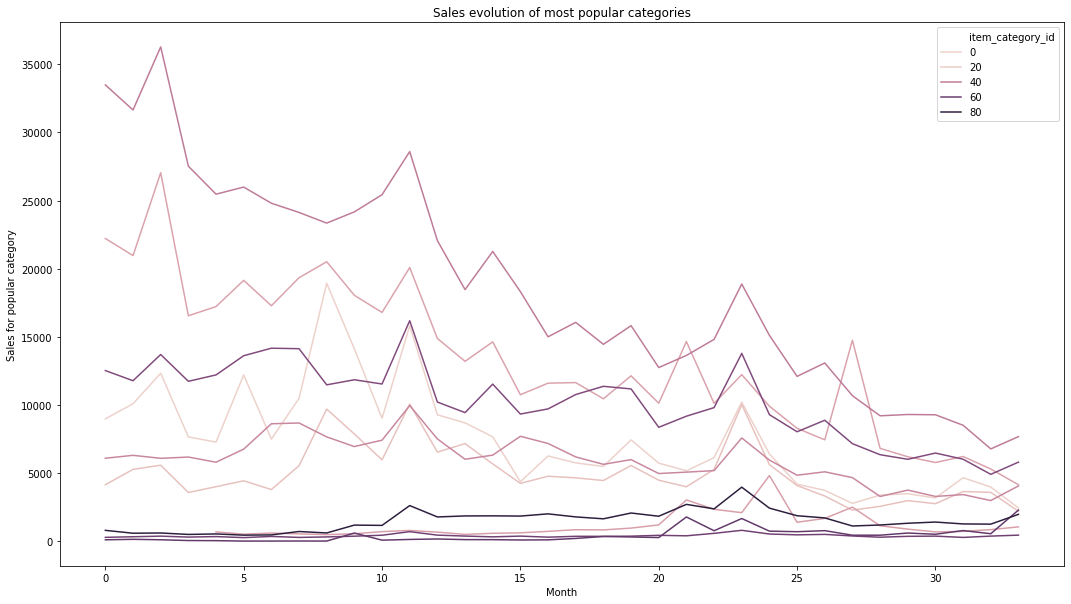

In [15]:
plt.figure(figsize=(18, 10))
g = sns.lineplot(x="date_block_num", y="item_cnt_day", hue="item_category_id", data=sales_by_month_popular_categories)
g.set_title("Sales evolution of most popular categories")
g.set_xlabel("Month")
g.set_ylabel("Sales for popular category")

In [16]:
sales_by_category = sales_items.groupby("item_category_id").agg({'item_cnt_day':'sum'}).reset_index()
sales_by_category.head()

,item_category_id,item_cnt_day
0,0,3.0
1,1,2.0
2,2,19597.0
3,3,29807.0
4,4,2407.0


### Most popular sales categories

Text(0, 0.5, 'Total sales')

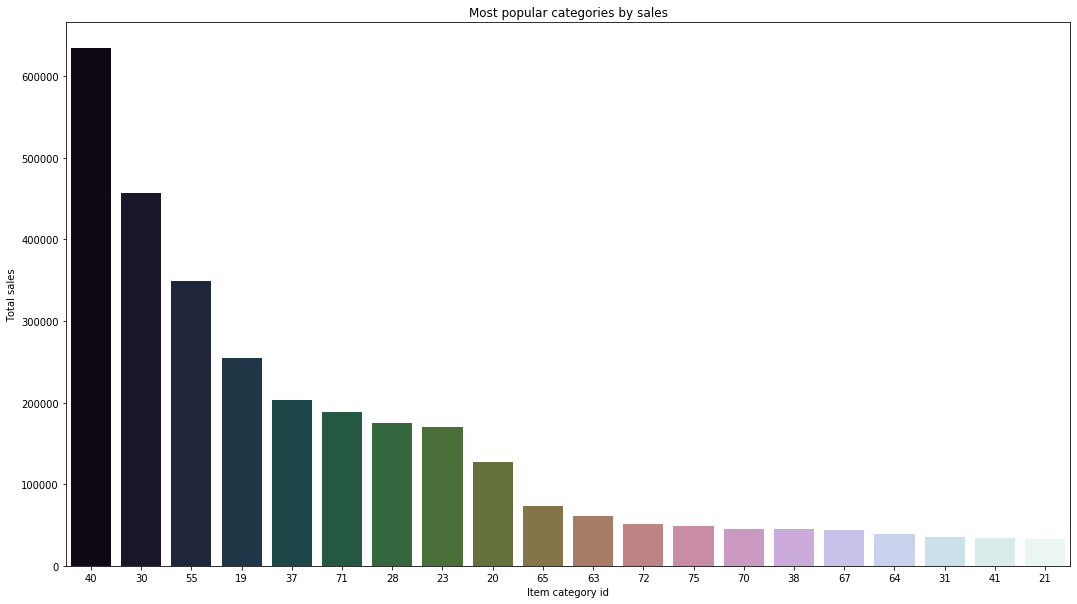

In [17]:
plt.figure(figsize=(18, 10))
g = sns.barplot(x="item_category_id", y="item_cnt_day", data=sales_by_category, order=sales_by_category.sort_values(by="item_cnt_day", ascending=False).item_category_id[:20], palette="cubehelix")
g.set_title("Most popular categories by sales")
g.set_xlabel("Item category id")
g.set_ylabel("Total sales")

In [18]:
ten_most_popular_categories = sales_by_category.sort_values(by="item_cnt_day", ascending=False)[:10][["item_category_id"]]
ten_most_popular_categories.head()

,item_category_id
40,40
30,30
55,55
19,19
37,37


In [19]:
sales_of_category_ten_most_popular = pd.merge(sales_items, ten_most_popular_categories, on="item_category_id", how="inner")
sales_of_category_ten_most_popular.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


In [20]:
sales_of_most_popular_categories_by_month = sales_of_category_ten_most_popular.groupby(["date_block_num", "item_category_id"]).agg({"item_cnt_day":"sum"}).reset_index()
sales_of_most_popular_categories_by_month.head()

,date_block_num,item_category_id,item_cnt_day
0,0,19,8983.0
1,0,23,4150.0
2,0,28,5435.0
3,0,30,22216.0
4,0,37,6094.0


### Sales of popular categories by month

Text(0, 0.5, 'Total sales')

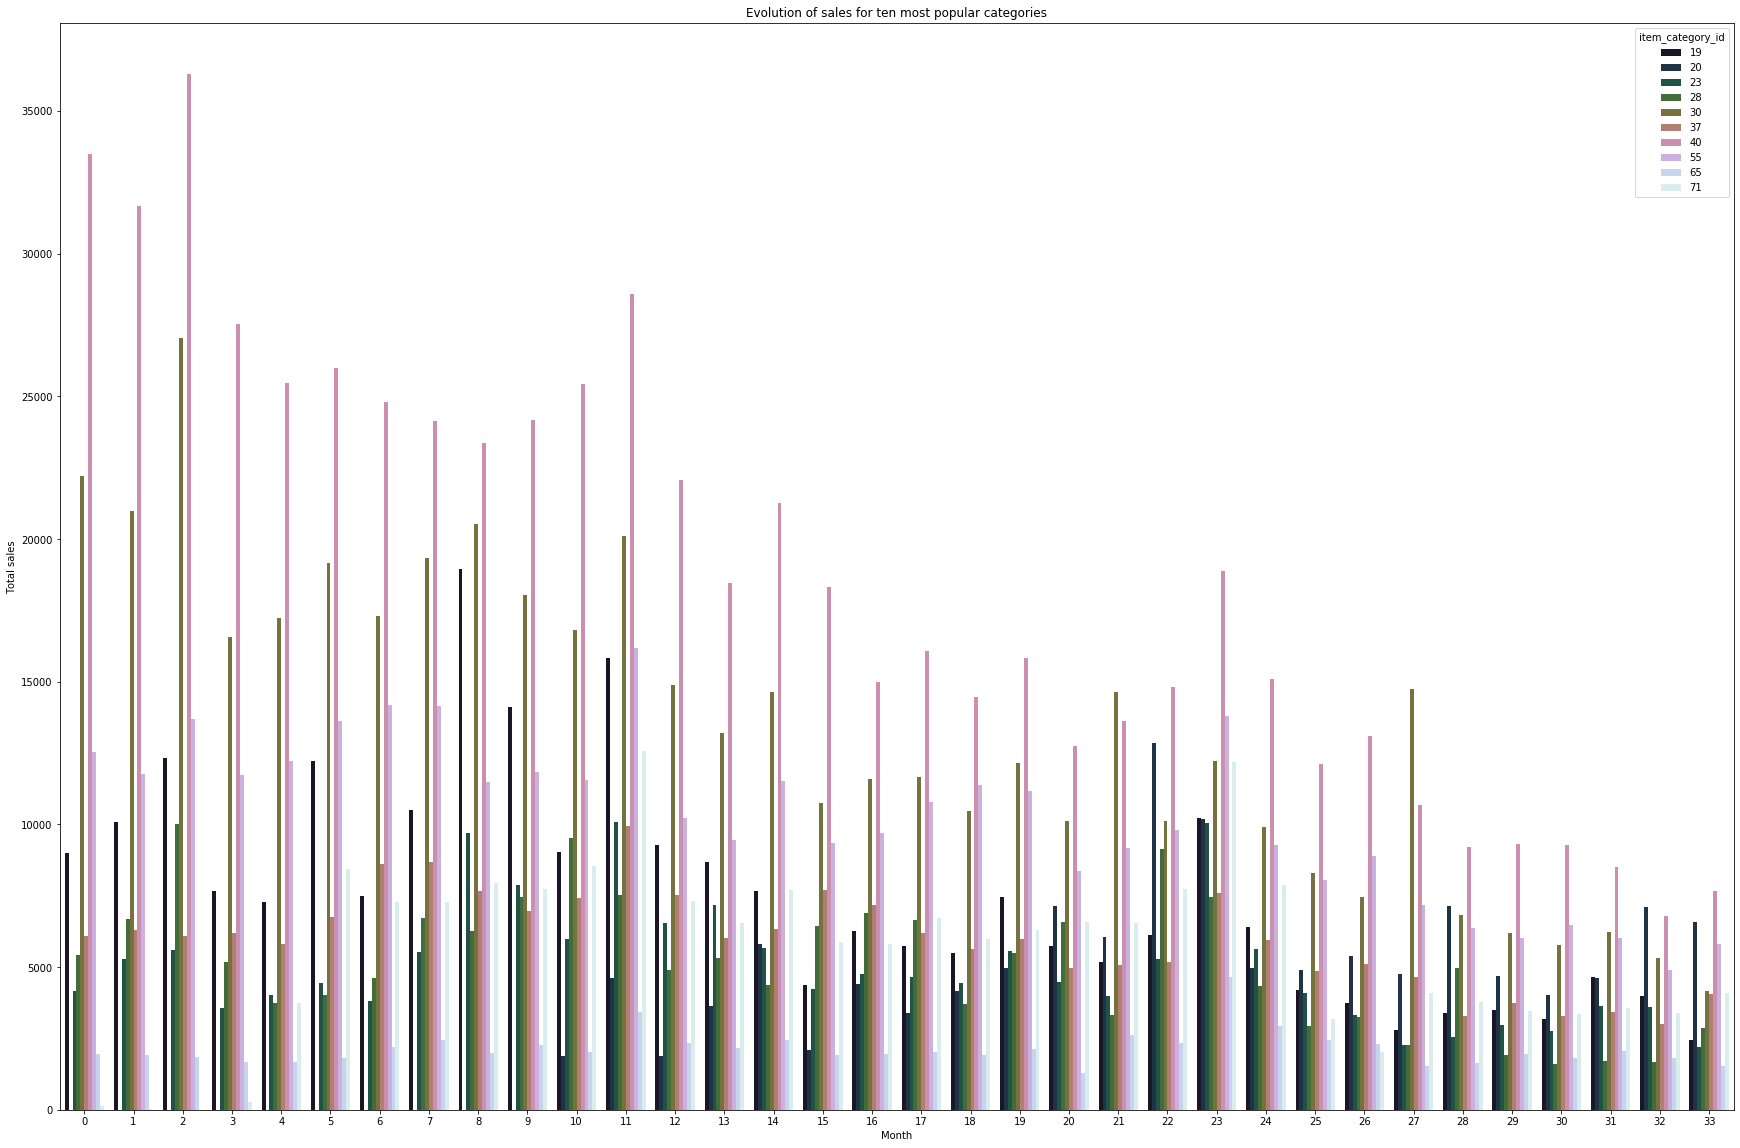

In [21]:
plt.figure(figsize=(30, 20))
g = sns.barplot(x="date_block_num", y="item_cnt_day", hue="item_category_id", data=sales_of_most_popular_categories_by_month, palette="cubehelix")
g.set_title("Evolution of sales for ten most popular categories")
g.set_xlabel("Month")
g.set_ylabel("Total sales")

In [22]:
sales_by_month = sales_train.groupby("date_block_num").agg({"item_cnt_day":"sum"}).reset_index()
sales_by_month.head()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0


### Evolution of sales by month

Text(0, 0.5, 'Total sales of month')

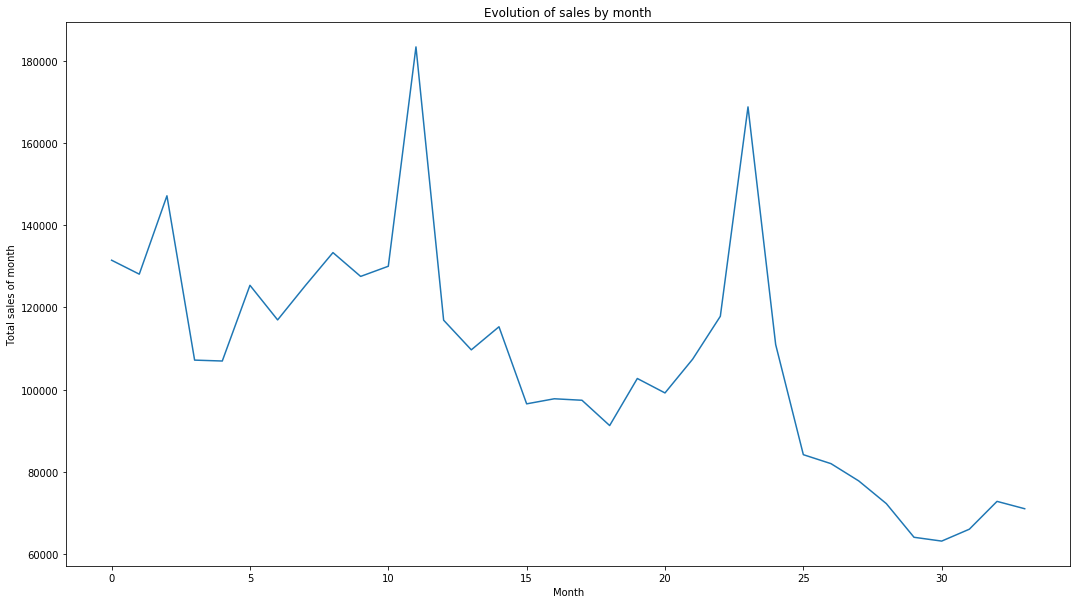

In [23]:
plt.figure(figsize=(18, 10))
g = sns.lineplot(x="date_block_num", y="item_cnt_day", data=sales_by_month)
g.set_title("Evolution of sales by month")
g.set_xlabel("Month")
g.set_ylabel("Total sales of month")

In [24]:
sales_by_month['sum_last_5_months'] = sales_by_month['item_cnt_day'].rolling(min_periods=1, window=5).sum()
sales_by_month.head()

,date_block_num,item_cnt_day,sum_last_5_months
0,0,131479.0,131479.0
1,1,128090.0,259569.0
2,2,147142.0,406711.0
3,3,107190.0,513901.0
4,4,106970.0,620871.0


In [25]:
dfs = []
for x in range(5):
    sum_last_5_months = sales_by_month[sales_by_month["date_block_num"] == x][["sum_last_5_months"]]
    df = pd.DataFrame(sum_last_5_months, columns=["sum_last_5_months"])
    #print(df)
    df["ema_5_months"] = df["sum_last_5_months"] / (x+1)
    df["date_block_num"] = x
    #print(df)
    dfs.append(df.copy())

In [26]:
mayor_df = sales_by_month[sales_by_month.date_block_num > 5]
mayor_df["ema_5_months"] = mayor_df["sum_last_5_months"] / 5
mayor_df.head()

/home/urielkelman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date_block_num,item_cnt_day,sum_last_5_months,ema_5_months
6,6,116966.0,603649.0,120729.8
7,7,125291.0,581798.0,116359.6
8,8,133332.0,607940.0,121588.0
9,9,127541.0,628511.0,125702.2
10,10,130009.0,633139.0,126627.8


In [27]:
df = pd.DataFrame(columns=["sum_last_5_months", "ema_5_months", "date_block_num"])
for d in dfs:
    df = df.append(d)
df = df.append(mayor_df[["sum_last_5_months", "ema_5_months", "date_block_num"]])
df["item_cnt_day"] = sales_by_month["item_cnt_day"]
df.sample(7)

,sum_last_5_months,ema_5_months,date_block_num,item_cnt_day
20,488428.0,97685.600000,20,99208.0
15,621781.0,124356.200000,15,96556.0
30,359437.0,71887.400000,30,63187.0
0,131479.0,131479.000000,0,131479.0
2,406711.0,135570.333333,2,147142.0
33,337279.0,67455.800000,33,71056.0
17,516759.0,103351.800000,17,97429.0


### Total sales vs EMA of five months

Text(0, 0.5, 'Total sales')

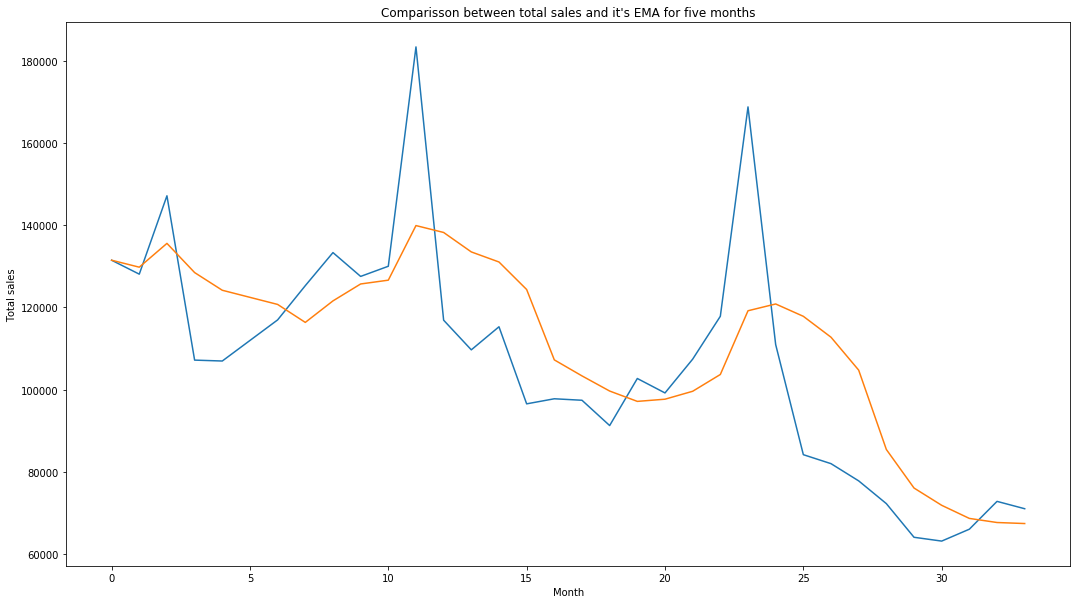

In [28]:
plt.figure(figsize=(18, 10))
g = sns.lineplot(x="date_block_num", y="item_cnt_day", data=df)
g = sns.lineplot(x="date_block_num", y="ema_5_months", data=df)
g.set_title("Comparisson between total sales and it's EMA for five months")
g.set_xlabel("Month")
g.set_ylabel("Total sales")

In [30]:
sales_items.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


In [35]:
sales_by_shop = sales_items.groupby("shop_id").agg({"item_cnt_day":"sum"}).rename(columns={"item_cnt_day":"total_sales"}).reset_index()
sales_by_shop.head()

,shop_id,total_sales
0,0,11705.0
1,1,6311.0
2,2,30620.0
3,3,28355.0
4,4,43942.0


### Distribution of sales by shop

Text(0.5, 0, 'Sales')

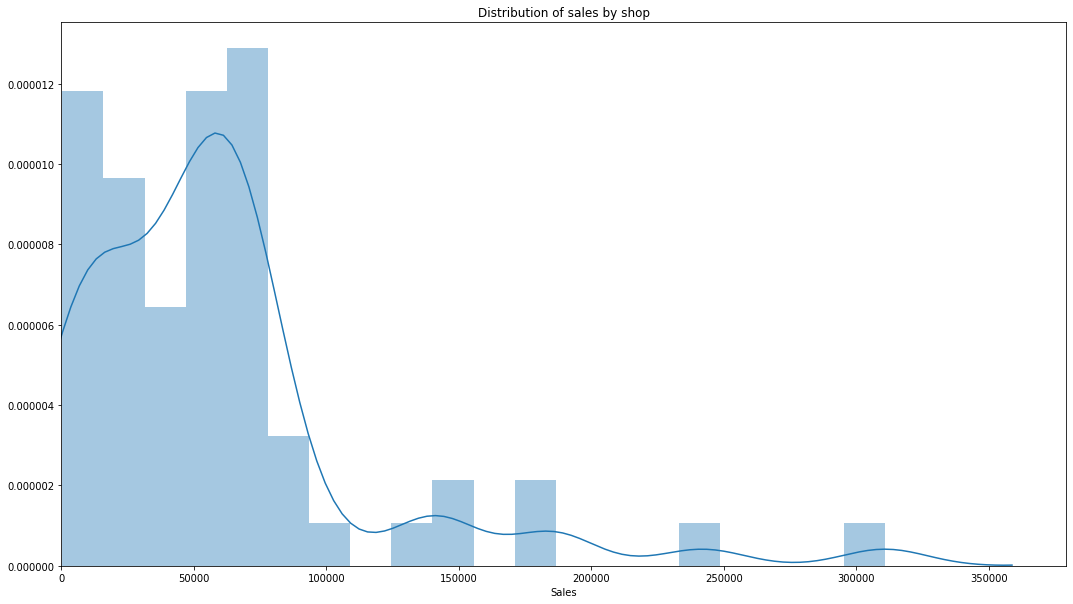

In [54]:
plt.figure(figsize=(18, 10))
g = sns.distplot(sales_by_shop["total_sales"], bins = 20, hist=True)
plt.xlim(-1)
g.set_title("Distribution of sales by shop")
g.set_xlabel("Sales")

In [58]:
sales_by_item_and_shop_by_month = sales_items.groupby(["item_id", "shop_id", "date_block_num"]).agg({"item_cnt_day":"sum"}).rename(columns={"item_cnt_day":"total_sales"}).reset_index()
sales_by_item_and_shop_by_month.head()

,item_id,shop_id,date_block_num,total_sales
0,0,54,20,1.0
1,1,55,15,2.0
2,1,55,18,1.0
3,1,55,19,1.0
4,1,55,20,1.0


### Distribution of sales by item and shop in a month

Text(0.5, 0, 'Sales')

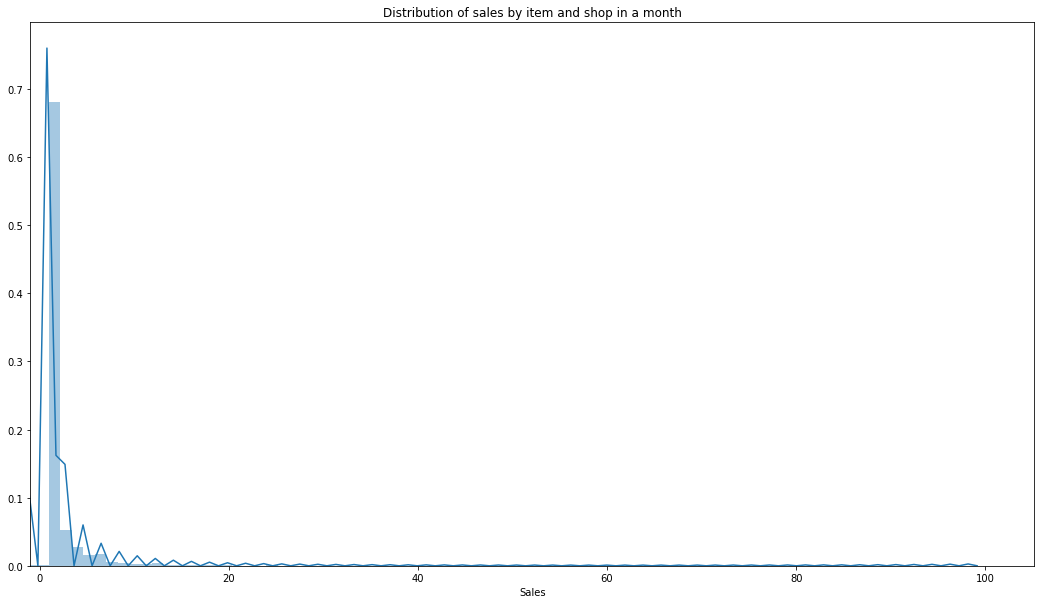

In [69]:
plt.figure(figsize=(18, 10))
g = sns.distplot(sales_by_item_and_shop_by_month[sales_by_item_and_shop_by_month["total_sales"] < 100]["total_sales"], bins = 100, hist=True)
plt.xlim(-1)
g.set_title("Distribution of sales by item and shop in a month")
g.set_xlabel("Sales")

In [89]:
spent_by_item = sales_items.groupby("item_id").agg({"item_price":["max", "nunique", "sum"], "item_cnt_day":"sum"}).reset_index()
spent_by_item.head()

item_id item_price                  item_cnt_day
                 max nunique      sum          sum
0       0       58.0       1     58.0          1.0
1       1     4490.0       1  26940.0          6.0
2       2       58.0       1    116.0          2.0
3       3      100.0       2    158.0          2.0
4       4       58.0       1     58.0          1.0

In [90]:
spent_by_item["item_price"]["nunique"].value_counts()
# There are items with different prices across the time.

1      5926
2      3701
3      2842
4      2102
5      1564
       ... 
104       1
344       1
105       1
121       1
335       1
Name: nunique, Length: 117, dtype: int64

In [118]:
percentil_n = np.percentile(a = np.array(spent_by_item["item_price"]["sum"]), q = 90)
percentil_n

191828.18200000015

### Relationship bewtween item price and spending on item

Text(0, 0.5, 'Item spending')

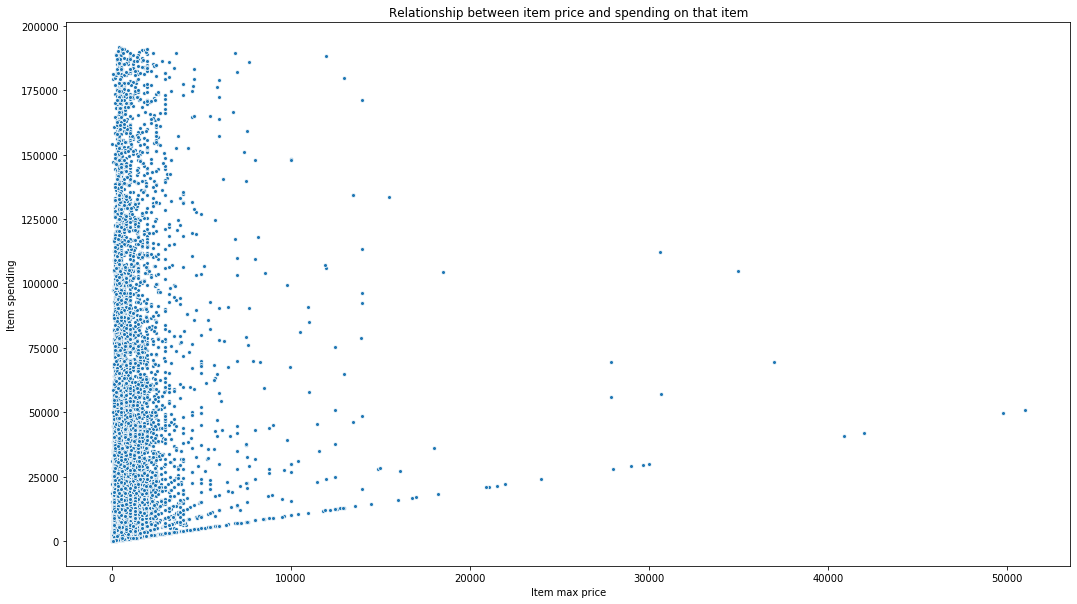

In [122]:
plt.figure(figsize=(18, 10))

g = sns.scatterplot(x=spent_by_item["item_price"]["max"], y=spent_by_item[spent_by_item["item_price"]["sum"] < percentil_n]["item_price"]["sum"], s=15)
g.set_title("Relationship between item price and spending on that item")
g.set_xlabel("Item max price")
g.set_ylabel("Item spending")

In [132]:
percentil_n = np.percentile(a = np.array(spent_by_item["item_cnt_day"]["sum"]), q = 99)
percentil_q = np.percentile(a = np.array(spent_by_item["item_price"]["max"]), q = 99)

### Relationship between item purchases and purchases for that item

Text(0, 0.5, 'Item purchases')

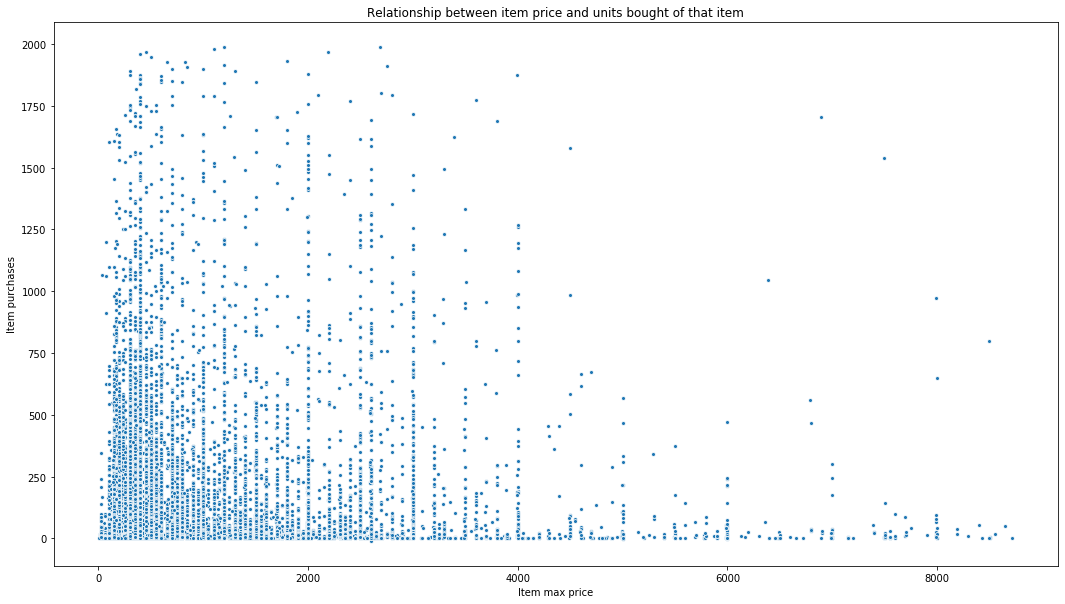

In [133]:
plt.figure(figsize=(18, 10))

g = sns.scatterplot(x=spent_by_item[spent_by_item["item_price"]["max"] < percentil_q]["item_price"]["max"], y=spent_by_item[spent_by_item["item_cnt_day"]["sum"] < percentil_n]["item_cnt_day"]["sum"], s=15)
g.set_title("Relationship between item price and units bought of that item")
g.set_xlabel("Item max price")
g.set_ylabel("Item purchases")

In [136]:
sales_items.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


In [146]:
grouped = sales_items.groupby("item_id").agg({"shop_id":"nunique", "item_cnt_day":"sum", "item_category_id":"max"}).reset_index().rename(columns={"shop_id":"total_shops", "item_cnt_day":"total_sales"})
grouped = grouped[grouped["total_sales"] < np.percentile(a = np.array(grouped["total_sales"]), q = 99)]
grouped.head()

,item_id,total_shops,total_sales,item_category_id
0,0,1,1.0,40
1,1,1,6.0,76
2,2,1,2.0,40
3,3,1,2.0,40
4,4,1,1.0,40


### Relationship between sales of an item and the quantity of shops that sold that item 

Text(0, 0.5, 'Total purchases')

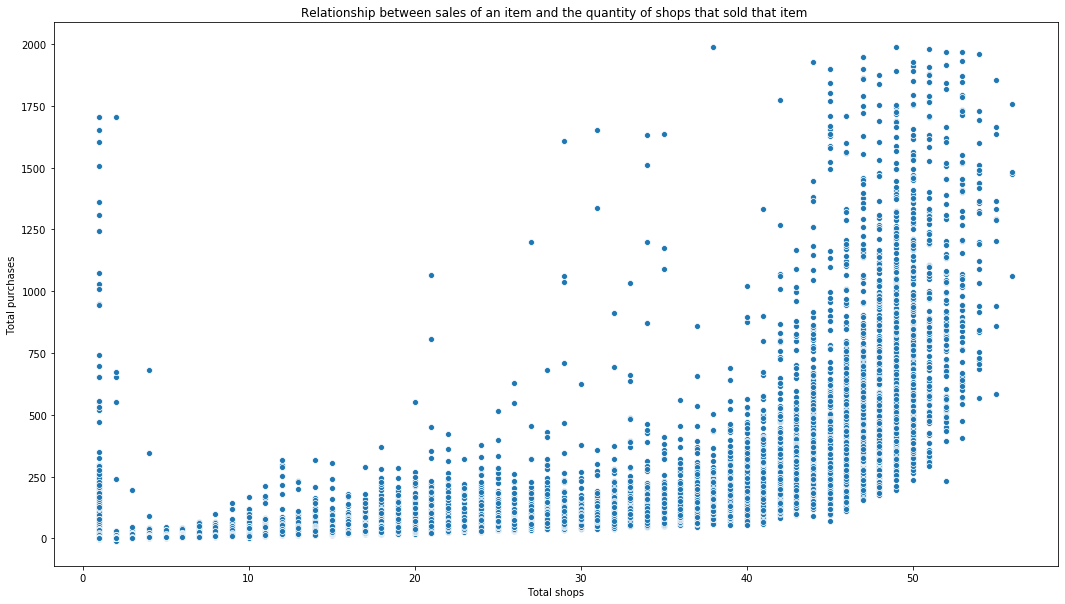

In [151]:
plt.figure(figsize=(18, 10))
g = sns.scatterplot(x="total_shops", y="total_sales", data=grouped)
g.set_title("Relationship between sales of an item and the quantity of shops that sold that item ")
g.set_xlabel("Total shops")
g.set_ylabel("Total purchases")